<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/BoostingClassifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hyperparameter Optimization Techniques and Libraries

 What Is Hyperparameter Tuning?

Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. These parameters are defined by us which can be manipulated according to programmer wish. Machine learning algorithms never learn these parameters. These are tuned so that we could get good performance by the model. Hyperparameter tuning aims to find such parameters where the performance of the model is highest or where the model performance is best and the error rate is least. 

What Steps To Follow For Hyper Parameter Tuning?

1)Select the type of model we want to use 

2) Check what are the parameters of the model.

3)Select the methods for searching the hyperparameter

4) Select the cross-validation approach

5) Evaluate the model using the score

There are several methods for hyperparameter tuning in machine learning, including:

Grid Search: Grid search involves defining a range of hyperparameter values and training the model on all possible combinations of these values. The performance of the model is evaluated on a validation set, and the best combination of hyperparameters is selected based on the highest performance.

Random Search: Random search involves defining a range of hyperparameter values and randomly sampling combinations of these values. The performance of the model is evaluated on a validation set, and the best combination of hyperparameters is selected based on the highest performance.

Bayesian Optimization: Bayesian optimization is a more sophisticated method for hyperparameter tuning. It involves constructing a probabilistic model of the objective function (i.e., the performance metric) and using this model to guide the search for optimal hyperparameters. Bayesian optimization is particularly useful when the search space for hyperparameters is large and complex.

Gradient-based Optimization: Gradient-based optimization involves optimizing the hyperparameters using gradient descent. This method is more computationally expensive than other methods, but it can be effective for complex models and high-dimensional hyperparameter spaces.

Ensemble-based Optimization: Ensemble-based optimization involves training multiple models with different hyperparameter settings and combining their predictions to make a final prediction. This method can be effective when the performance of individual models is highly variable across different hyperparameter settings.

Overall, the choice of hyperparameter tuning method depends on the specific problem and the size and complexity of the hyperparameter space.

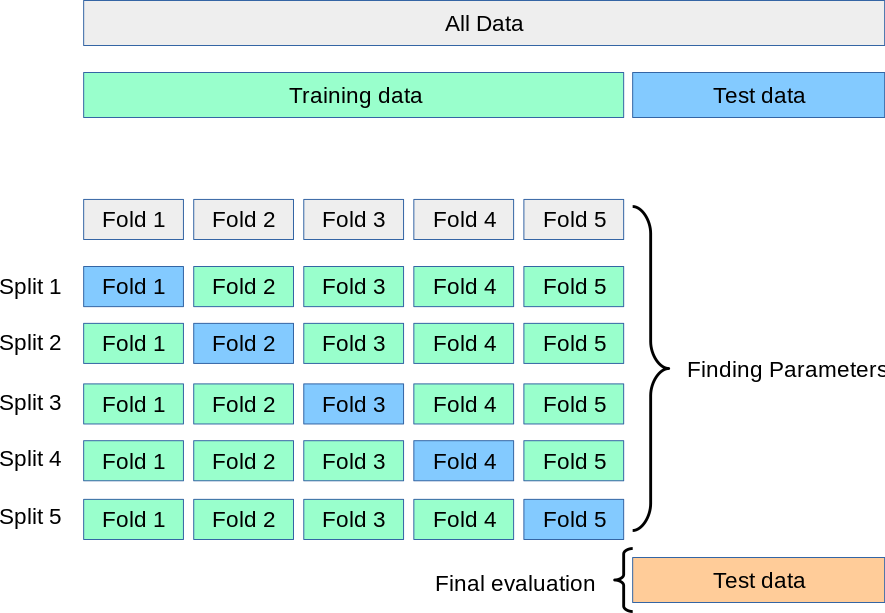

In [ ]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

df["International plan"] = pd.factorize(df["International plan"])[0]
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]
X=df.drop(["State", "Churn"], axis=1)


In [ ]:
X

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [ ]:
#split data into 2 parts:test and train
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17
)



In [ ]:
#Decison Tree
from sklearn.metrics import accuracy_score,confusion_matrix
tree = DecisionTreeClassifier(random_state=17)
tree.fit(X_train, y_train)

# make predictions for test data
tree_pred = tree.predict(X_test)
print(accuracy_score(y_test, tree_pred))
print(confusion_matrix(y_test, tree_pred)) 
sum(y_test)

0.92
[[827  40]
 [ 40  93]]


133

In [ ]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=17 )
forest.fit(X_train, y_train)

# make predictions for test data

forest_pred = forest.predict(X_test)
print(accuracy_score(y_test, forest_pred) )
print(confusion_matrix(y_test, forest_pred)) 
sum(y_test)

NameError: ignored

In [ ]:
# XGBoost
from xgboost import XGBClassifier
model = XGBClassifier(random_state=17)
model.fit(X_train, y_train)
# make predictions for test data
xgb_pred = model.predict(X_test)
print(accuracy_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred)) 
sum(y_test)

0.951
[[858   9]
 [ 40  93]]


133

In [ ]:
#Light GBM
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=17)
lgb_model.fit(X_train, y_train)
# make predictions for test data
print(accuracy_score(y_test, lgb_model.predict(X_test)))
print(confusion_matrix(y_test, lgb_model.predict(X_test))) 


0.956
[[861   6]
 [ 38  95]]


In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=17)
gbm_model.fit(X_train, y_train)
print(accuracy_score(y_test, gbm_model.predict(X_test)))
print(confusion_matrix(y_test, gbm_model.predict(X_test))) 


0.954
[[858   9]
 [ 37  96]]


In [ ]:
#Ada Boost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=17)
ada.fit(X_train, y_train)
print(accuracy_score(y_test, ada.predict(X_test)))
print(confusion_matrix(y_test, ada.predict(X_test)))

0.874
[[823  44]
 [ 82  51]]


In [ ]:
 #Number of feaures(input) for X
 X_train.shape[1]

18

Random Search CV

In [ ]:
from time import time
t0=time()
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
xgb_params = {"max_depth": range(5, X_train.shape[1],3), "max_features": range(5, X_train.shape[1],3)}

forest = RandomForestClassifier(random_state=17 )
forest_grid = RandomizedSearchCV(forest, xgb_params, cv=3, n_jobs=-1, verbose=True)
forest_grid.fit(X_train,y_train)

print(forest_grid.best_params_, forest_grid.best_score_)
print(accuracy_score(y_test, forest_grid.predict(X_test)))
t1=time()
print('Time is ' +str(t1-t0))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'max_features': 8, 'max_depth': 14} 0.9455643671581976
0.953
Time is 33.64668297767639


Grid Search CV

In [ ]:
#We can not choose model based on test data.
#Random Forest CV
from time import time
t0=time()
from sklearn.model_selection import GridSearchCV, cross_val_score
xgb_params = {"max_depth": range(5, X_train.shape[1],3), "max_features": range(5, X_train.shape[1],3)}

forest = RandomForestClassifier(random_state=17 )
forest_grid = GridSearchCV(forest, forest_params, cv=3, n_jobs=-1, verbose=True)
forest_grid.fit(X_train,y_train)

print(forest_grid.best_params_, forest_grid.best_score_)
print(accuracy_score(y_test, forest_grid.predict(X_test)))
t1=time()
print('Time is ' +str(t1-t0))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'max_depth': 17, 'max_features': 8} 0.946421265187332
0.954
Time is 44.77019786834717


In [ ]:
#Random Forest with best parameters give same accuracy result  with forest_grid.predict(X_test)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=17,max_depth=17,max_features=8)
forest.fit(X_train, y_train)

# make predictions for test data

forest_pred = forest.predict(X_test)
print(accuracy_score(y_test, forest_pred) )

0.954


In [ ]:
#XGBoost CV
# XGBoost
from xgboost import XGBClassifier

t0=time()
from sklearn.model_selection import GridSearchCV, cross_val_score
xgb_params = {"max_depth": range(5, X_train.shape[1],3), "max_features": range(5, X_train.shape[1],3)}
xgbm = XGBClassifier(random_state=17)
xgb_grid = GridSearchCV(xgbm, xgb_params , cv=3, n_jobs=-1, verbose=True)
xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_params_, xgb_grid.best_score_)
print(accuracy_score(y_test, xgb_grid.predict(X_test)))
t1=time()
print('Time is ' +str(t1-t0))


Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'max_depth': 5, 'max_features': 5} 0.9481361640744673
0.955
Time is 28.817909479141235


In [ ]:
#Light GBM CV
import lightgbm as lgb


from time import time
t0=time()
from sklearn.model_selection import GridSearchCV, cross_val_score
lgb_params = {"max_depth": range(5, X_train.shape[1],3), "max_features": range(5, X_train.shape[1],3)}
lgbm = lgb.LGBMClassifier(random_state=17)
lgb_grid = GridSearchCV(lgbm, lgb_params , cv=3, n_jobs=-1, verbose=True)
lgb_grid.fit(X_train,y_train)

print(lgb_grid.best_params_, lgb_grid.best_score_)
print(accuracy_score(y_test,lgb_grid.predict(X_test)))
t1=time()
print('Time is ' +str(t1-t0))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'max_depth': 17, 'max_features': 5} 0.9558526576521436
0.954
Time is 10.507242679595947


In [ ]:
#Gradient Based CV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
lgb_params = {"max_depth": range(5, X_train.shape[1],3), "max_features": range(5, X_train.shape[1],3)}
gbm_model = GradientBoostingClassifier(random_state=17)
gbm_grid = GridSearchCV(gbm_model , lgb_params , cv=3, n_jobs=-1, verbose=True)
gbm_grid.fit(X_train,y_train)

print(gbm_grid.best_params_, gbm_grid.best_score_)
print(accuracy_score(y_test,gbm_grid.predict(X_test)))
t1=time()
print('Time is ' +str(t1-t0))



Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'max_depth': 8, 'max_features': 11} 0.9502784091473037
0.951
Time is 247.14879035949707


In [ ]:
#Which model give  the highest CV  
#and what is the accuracy result on test data?


Some of the popular libraries for hyper paramater optimization are optuna or hyperopt . You can check following link for comparison of two methods. 

https://neptune.ai/blog/optuna-vs-hyperopt


By default, Optuna implements a Bayesian optimization algorithm named Tree-structured Parzen Estimator(TPE) but it can be easily switched to other existing algorithms in the package. The some of the other algorithms used by Optuna  are Grid Search, Random Search, CMA-ES based algortihm, Quasi Monte Carlo sampling algorithm  and Genetic Algorithm.

In [ ]:
!pip install optuna


In [ ]:
# Minimize (x - 2) ** 2 if x is between ( -10, 10)
import optuna

def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials=100)

print(study.best_params) # E.g. {'x': 2.002108042}
print(study.best_trial)

In [ ]:
# Maximize (x - 2) ** 2 if x is between ( -10, 10)
import optuna

def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study(direction="maximize")#We specify this is maximization problem
study.optimize(objective, n_trials=100)

print(study.best_params) # E.g. {'x':- 9.992108042}
print(study.best_trial)

In [ ]:
import optuna

import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    x, y = X_train,y_train

    classifier_name = trial.suggest_categorical("classifier", ["Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier" ])
    if classifier_name == "Random Forest":
         from sklearn.ensemble import RandomForestClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = sklearn.ensemble.RandomForestClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
         

    elif classifier_name == "XGBoost":
         from xgboost import XGBClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = XGBClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
         

    elif classifier_name == "LightGBM":
         import lightgbm as lgb
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = lgb.LGBMClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
       
       
    else:
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = sklearn.ensemble.GradientBoostingClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )
        
         

    accuracy=sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3).mean()
   
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2022-03-16 11:06:13,482] A new study created in memory with name: no-name-228daac0-7fa1-47e9-8ddc-9480046e17ec
[I 2022-03-16 11:06:17,121] Trial 0 finished with value: 0.9468497142018993 and parameters: {'classifier': 'XGBoost', 'max_depth': 8, 'max_features': 6}. Best is trial 0 with value: 0.9468497142018993.
[I 2022-03-16 11:06:18,424] Trial 1 finished with value: 0.9481334070023015 and parameters: {'classifier': 'XGBoost', 'max_depth': 7, 'max_features': 5}. Best is trial 1 with value: 0.9481334070023015.
[I 2022-03-16 11:06:19,646] Trial 2 finished with value: 0.9361329746933861 and parameters: {'classifier': 'Random Forest', 'max_depth': 5, 'max_features': 8}. Best is trial 1 with value: 0.9481334070023015.
[I 2022-03-16 11:06:20,852] Trial 3 finished with value: 0.9485646130890347 and parameters: {'classifier': 'XGBoost', 'max_depth': 12, 'max_features': 7}. Best is trial 3 with value: 0.9485646130890347.
[I 2022-03-16 11:06:23,893] Trial 4 finished with value: 0.948991959274

FrozenTrial(number=15, values=[0.956281658081144], datetime_start=datetime.datetime(2022, 3, 16, 11, 6, 36, 353952), datetime_complete=datetime.datetime(2022, 3, 16, 11, 6, 36, 861351), params={'classifier': 'LightGBM', 'max_depth': 12, 'max_features': 2}, distributions={'classifier': CategoricalDistribution(choices=('Random Forest', 'XGBoost', 'LightGBM', 'GradientBoostingClassifier')), 'max_depth': IntUniformDistribution(high=18, low=2, step=1), 'max_features': IntUniformDistribution(high=18, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=15, state=TrialState.COMPLETE, value=None)


In [ ]:
#Print Best Model
study.best_params

{'classifier': 'LightGBM', 'max_depth': 12, 'max_features': 2}

In [ ]:
#Light GBM Test Result with Best Parameters
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=17,max_depth=12,max_features=2)
lgb_model.fit(X_train, y_train)
# make predictions for test data
print(accuracy_score(y_test, lgb_model.predict(X_test)))
print(confusion_matrix(y_test, lgb_model.predict(X_test))) 

0.956
[[861   6]
 [ 38  95]]


In [ ]:
#Apply Best Model Parameter to Test Data
import optuna

import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    x, y = X_train,y_train

    param = {
        "objective": "binary",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "max_dept" :trial.suggest_int("max_depth", 2, X_train.shape[1]),
        "max_features" : trial.suggest_int("max_features", 2,X_train.shape[1]),       
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    import lightgbm as lgb
    classifier_obj = lgb.LGBMClassifier(random_state=17,**param)

    accuracy=sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3).mean()
   
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2022-03-16 11:12:06,792] A new study created in memory with name: no-name-a47f4c82-3889-4e92-a1d1-60fb6d06917b
[I 2022-03-16 11:12:09,487] Trial 0 finished with value: 0.9005601267812064 and parameters: {'max_depth': 2, 'max_features': 8, 'num_leaves': 95, 'feature_fraction': 0.7356031545800499, 'bagging_fraction': 0.5842052165224785, 'bagging_freq': 1, 'min_child_samples': 73}. Best is trial 0 with value: 0.9005601267812064.
[I 2022-03-16 11:12:09,775] Trial 1 finished with value: 0.8658430740692952 and parameters: {'max_depth': 11, 'max_features': 8, 'num_leaves': 24, 'feature_fraction': 0.9283871004799705, 'bagging_fraction': 0.46783616284560037, 'bagging_freq': 7, 'min_child_samples': 76}. Best is trial 0 with value: 0.9005601267812064.
[I 2022-03-16 11:12:10,854] Trial 2 finished with value: 0.9451397780446623 and parameters: {'max_depth': 14, 'max_features': 2, 'num_leaves': 191, 'feature_fraction': 0.9806681762852808, 'bagging_fraction': 0.9422907016106667, 'bagging_freq': 3,

FrozenTrial(number=91, values=[0.9584244545684134], datetime_start=datetime.datetime(2022, 3, 16, 11, 13, 19, 878184), datetime_complete=datetime.datetime(2022, 3, 16, 11, 13, 20, 831317), params={'max_depth': 13, 'max_features': 5, 'num_leaves': 131, 'feature_fraction': 0.9602930312450314, 'bagging_fraction': 0.9381379977950232, 'bagging_freq': 6, 'min_child_samples': 16}, distributions={'max_depth': IntUniformDistribution(high=18, low=2, step=1), 'max_features': IntUniformDistribution(high=18, low=2, step=1), 'num_leaves': IntUniformDistribution(high=256, low=2, step=1), 'feature_fraction': UniformDistribution(high=1.0, low=0.4), 'bagging_fraction': UniformDistribution(high=1.0, low=0.4), 'bagging_freq': IntUniformDistribution(high=7, low=1, step=1), 'min_child_samples': IntUniformDistribution(high=100, low=5, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=91, state=TrialState.COMPLETE, value=None)


In [ ]:
 print(study.best_params)

{'max_depth': 13, 'max_features': 5, 'num_leaves': 131, 'feature_fraction': 0.9602930312450314, 'bagging_fraction': 0.9381379977950232, 'bagging_freq': 6, 'min_child_samples': 16}


In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(random_state=17,**study.best_params)
model.fit(X_train, y_train)
# make predictions for test data
xgb_pred = model.predict(X_test)
accuracy_score(y_test, xgb_pred)

0.958